# Import required libraries

In [44]:
import pandas as pd
import sklearn.model_selection as skms
import sklearn.metrics as skmt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utility functions

In [47]:
def compute_confusion_matrix(sufix,y_test, y_pred):

    labels = [False, True]

    # Compute the confusion matrix
    conf_matrix = skmt.confusion_matrix(y_test, y_pred, labels=labels)
    print(f"[{sufix}]confusion matrix:\n",conf_matrix)

    if len(conf_matrix[0]) == 1:
        print("Skipping ConfusionMatrixDisplay because a single label was found in 'y_true' and 'y_pred'.")
        return

    # Create a display object for the confusion matrix
    disp = skmt.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Granted", "Granted"])

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title(f"[{sufix}] Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def show_scholarship_prediction_results(classifier,X_test, y_test, y_pred):
    print(f'\n*************************************** {classifier} ***************************************')
    
    # Accuracy and Balanced Accuracy scores
    print("Accuracy:",round(skmt.accuracy_score(y_test,y_pred)*100,2),"%")
    print("Balanced Accuracy:",round(skmt.balanced_accuracy_score(y_test,y_pred)*100,2),"%")
    
    # General confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

    df1 =  pd.DataFrame(X_test)
    df1['scholarship'] = y_test
    df1['prediction'] = y_pred

    df_male = df1[(df1['gender'] == 0) & (df1['married']) == 0] # Single men
    df_female = df1[(df1['gender'] == 1) & (df1['married']) == 1] # Married women

     # confusion matrix per gender and civil status
    compute_confusion_matrix('Married women', df_female['scholarship'], df_female['prediction'])
    compute_confusion_matrix('Single men', df_male['scholarship'], df_male['prediction'])

    print('***********************************************************************************')


# Load dataset

In [8]:
dataset_ulr = 'https://raw.githubusercontent.com/leticiaarco/practical_ethical_ai_resources/refs/heads/main/scholarship.csv'
data = pd.read_csv(dataset_ulr)
data.head()
df = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       120 non-null    float64
 1   gender       120 non-null    object 
 2   married      120 non-null    object 
 3   achievement  120 non-null    float64
 4   scholarship  120 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 4.0+ KB


# Analyse data

## Exercise 3.1: Look at the dataset and generate the following plots
****(1) scholarship per gender, (2) scholarship per civil status, and (3) gender vs married****

#### Scholarship per gender

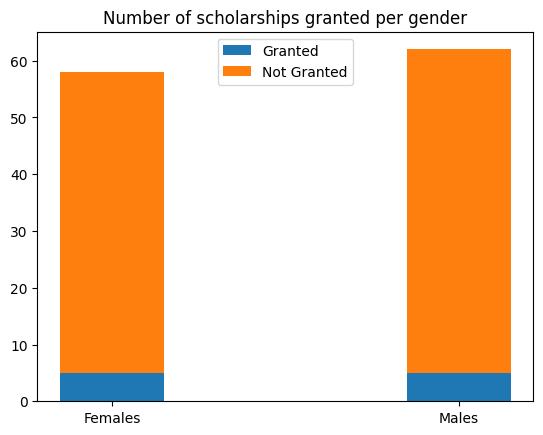

In [9]:
# Group by 'gender' and count scholarships
scholarship_granted = df[df['scholarship']].groupby('gender').size()
scholarship_nogranted = df[~df['scholarship']].groupby('gender').size()

feature_values = (
    "Females",
    "Males",
)

weight_counts = {
    "Granted": np.array([scholarship_granted.get('F', 0), scholarship_granted.get('M', 0)]),
    "Not Granted": np.array([scholarship_nogranted.get('F', 0), scholarship_nogranted.get('M', 0)]),
}

width = 0.3

# Plot scholarship per gender
fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of scholarships granted per gender")
ax.legend(loc="upper center")

plt.show()

#### Scholarship per civil status

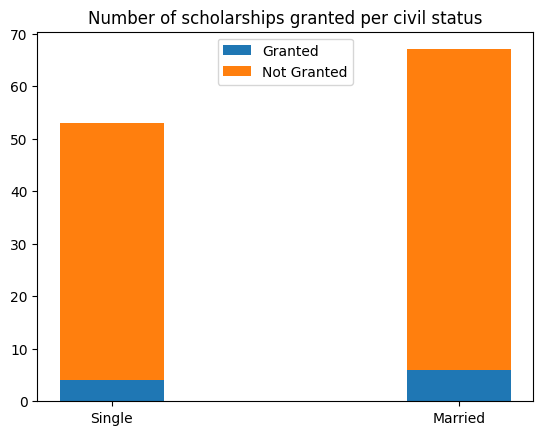

In [11]:
# Group by 'married' and count scholarships
scholarship_granted = df[df['scholarship']].groupby('married').size()
scholarship_nogranted = df[~df['scholarship']].groupby('married').size()

feature_values = (
    "Single",
    "Married",
)

weight_counts = {
    "Granted": np.array([scholarship_granted.get('N', 0), scholarship_granted.get('Y', 0)]),
    "Not Granted": np.array([scholarship_nogranted.get('N', 0), scholarship_nogranted.get('Y', 0)]),
}

width = 0.3

# Plot scholarship per civil status
fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of scholarships granted per civil status")
ax.legend(loc="upper center")

plt.show()

#### Gender vs civil status

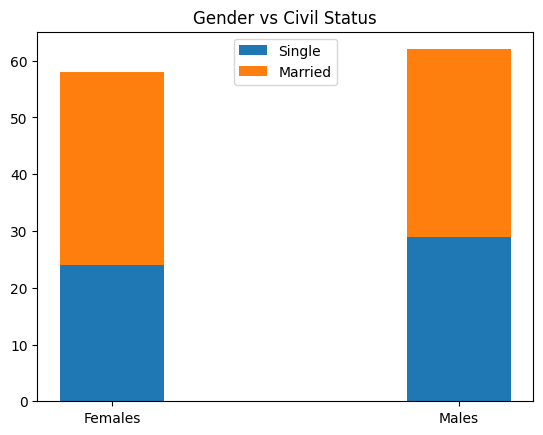

In [12]:
# Group by 'married' and count per gender
females = df[df['gender'] == 'F' ].groupby('married').size()
males = df[df['gender'] == 'M'].groupby('married').size()

feature_values = (
    "Females",
    "Males",   
)

weight_counts = {
    "Single": np.array([females.get('N', 0), males.get('N', 0)]),
    "Married": np.array([females.get('Y', 0), males.get('Y', 0)]),
}

width = 0.3

# Plot gender vs married
fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Gender vs Civil Status")
ax.legend(loc="upper center")

plt.show()

## Exercise 3.2: Look at the dataset and plot (Gender + Married) vs Scholarship

#### (Gender + Married) vs Scholarship

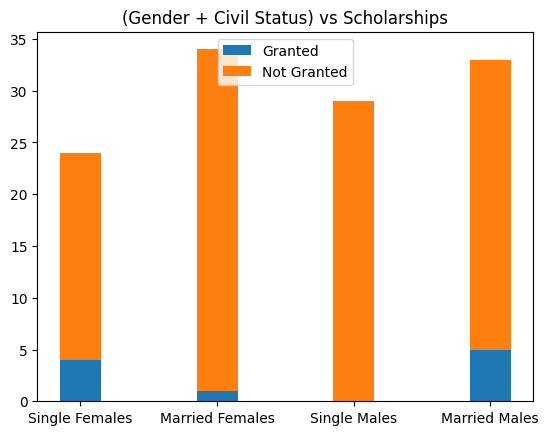

In [13]:
# Groupby scholarship and count by gender and civil status
married_females = df[(df['gender'] == 'F') & (df['married'] == 'Y') ].groupby('scholarship').size()
married_males = df[(df['gender'] == 'M') & (df['married'] == 'Y')].groupby('scholarship').size()
single_females = df[(df['gender'] == 'F') & (df['married'] == 'N') ].groupby('scholarship').size()
single_males = df[(df['gender'] == 'M') & (df['married'] == 'N')].groupby('scholarship').size()

feature_values = (
    "Single Females",
    "Married Females",
    "Single Males",
    "Married Males"
)

weight_counts = {
    "Granted": np.array([single_females.get(True, 0), married_females.get(True, 0), single_males.get(True, 0), married_males.get(True, 0)]),
    "Not Granted": np.array([single_females.get(False, 0),married_females.get(False, 0), single_males.get(False, 0), married_males.get(False, 0)]),
}

width = 0.3

# Plot (gender + married) vs scholarship
fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("(Gender + Civil Status) vs Scholarships")
ax.legend(loc="upper center")

plt.show()

## Exercise 3.3: Look at the dataset and generate the following plots
****(1) achievement per class, (2) salary per class  (scholarship=TRUE and scholarship=FALSE)****

#### Achievement per class (scholarship=TRUE and scholarship=FALSE)

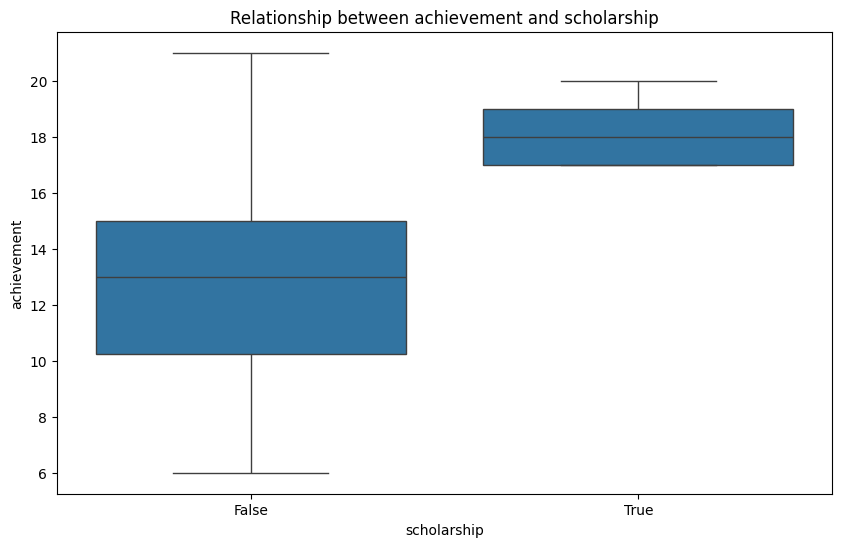

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='scholarship', y='achievement', data=data)
plt.xlabel('scholarship')
plt.ylabel('achievement')
plt.title('Relationship between achievement and scholarship')
plt.show()

#### Salary per class (scholarship=TRUE and scholarship=FALSE)

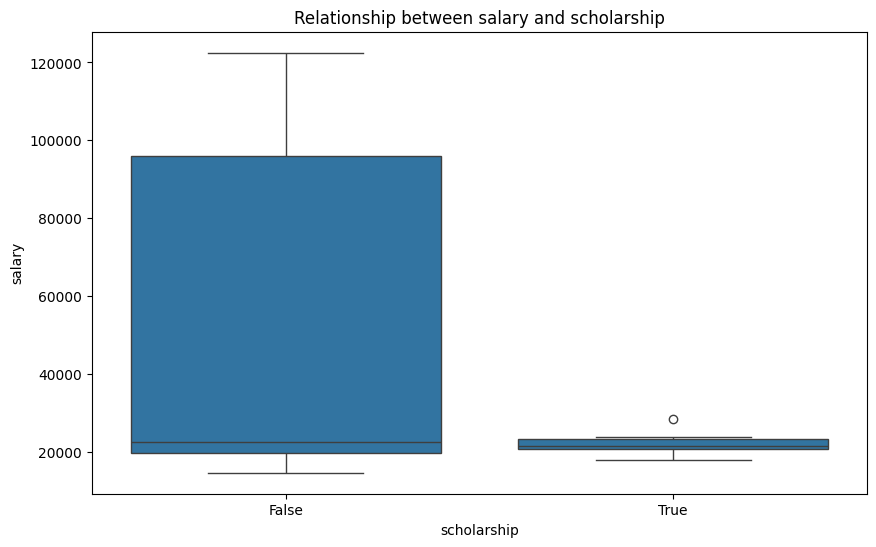

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='scholarship', y='salary', data=data)
plt.xlabel('scholarship')
plt.ylabel('salary')
plt.title('Relationship between salary and scholarship')
plt.show()

## Exercise 3.4: Look at the full dataset (ground truth) and plot scholarships granted or not per economic situation

#### Scholarships granted or not per economic situation

Load ground truth

In [19]:
import os

dataset_path = os.path.join('..', '..', 'datasets')

full_data = pd.read_csv(os.path.join(dataset_path, 'full_sustain_dataset.csv'))
full_data.head()
fdf = pd.DataFrame(full_data)

Plot the number of scholarships granted or not per economic situation

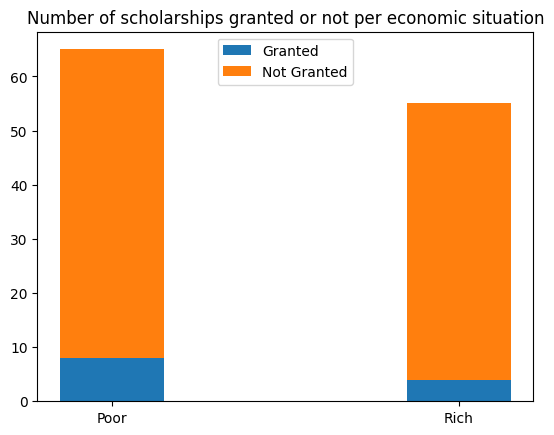

In [20]:
full_scholarship_granted = fdf[fdf['scholarship']].groupby('poor').size()
full_scholarship_nogranted = fdf[~fdf['scholarship']].groupby('poor').size()

feature_values = (
    "Poor",
    "Rich"
)

weight_counts = {
    "Granted": np.array([full_scholarship_granted.get(True, 0), full_scholarship_granted.get(False, 0)]),
    "Not Granted": np.array([full_scholarship_nogranted.get(False, 0), full_scholarship_nogranted.get(True, 0)]),
}

width = 0.3

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of scholarships granted or not per economic situation")
ax.legend(loc="upper center")

plt.show()

## Exercise 3.5: Select a protected group

Plot heatmap of gender vs civil status per class (scholarship=TRUE and scholarship=FALSE)

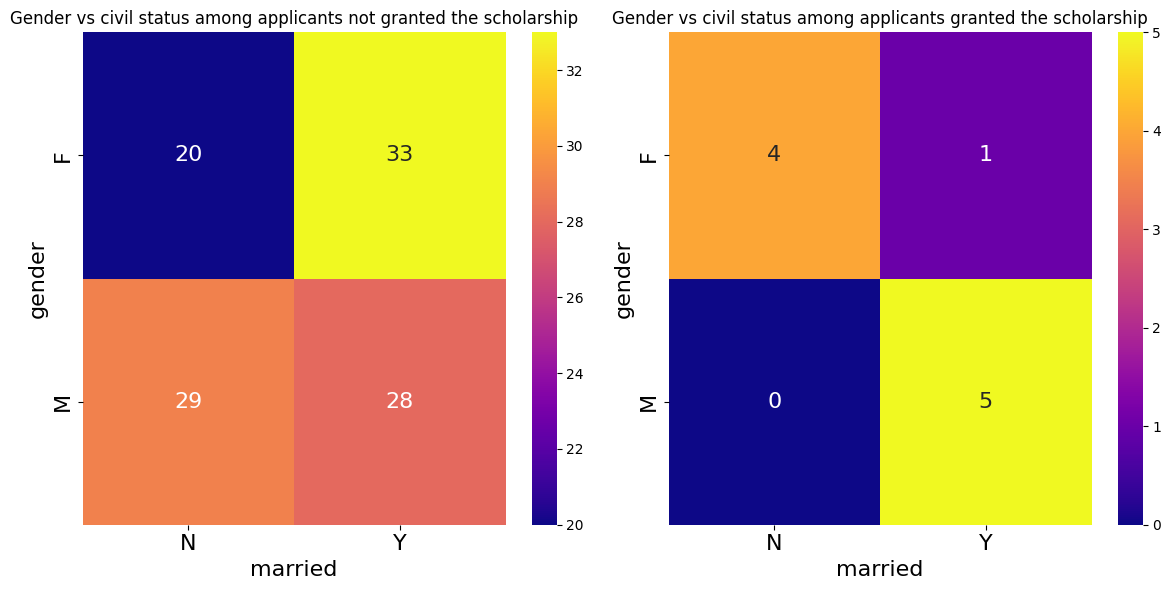

In [33]:
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first heatmap: Gender vs civil status among applicants not granted the scholarship
sns.heatmap(pd.crosstab(data[~data.scholarship]['gender'],data[~data.scholarship]['married']), ax=ax[0], cmap="plasma", cbar=True, annot=True, annot_kws={"size": 16})
ax[0].set_title("Gender vs civil status among applicants not granted the scholarship")
ax[0].set_xlabel("married", fontsize=16)  
ax[0].set_ylabel("gender", fontsize=16)  
ax[0].tick_params(axis='x', labelsize=16)  
ax[0].tick_params(axis='y', labelsize=16)  

# Plot the second heatmap: Gender vs civil status among applicants granted the scholarship
sns.heatmap(pd.crosstab(data[data.scholarship]['gender'],data[data.scholarship]['married']), ax=ax[1], cmap="plasma", cbar=True, annot=True, annot_kws={"size": 16})
ax[1].set_title("Gender vs civil status among applicants granted the scholarship")
ax[1].set_xlabel("married", fontsize=16)  
ax[1].set_ylabel("gender", fontsize=16)  
ax[1].tick_params(axis='x', labelsize=16)  
ax[1].tick_params(axis='y', labelsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

# Handle data

Transform feature values

In [37]:
transformed_data = data

transformed_data['gender'] = transformed_data['gender'].map({
    'F':1,
    'M':0,
})

transformed_data['married'] = transformed_data['married'].map({
    'Y':1,
    'N':0,
})

Split dataset by predictive features (X) and objective feature (y)

In [38]:
X = transformed_data.drop('scholarship', axis=1)
y = transformed_data['scholarship']

Split dataset in train and test sets

In [39]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

# Exercise 3.6: Apply a classifier and obtain the confusion matrix for the selected group

Import

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Decision Tree

Initialize and fit Decision Tree

In [45]:
# Initialize Decision Tree
dtree = DecisionTreeClassifier(random_state=0)

# Fit Decision Tree on the train set
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Make predictions and evaluate results


*************************************** DTree ***************************************
Accuracy: 97.22 %
Balanced Accuracy: 98.44 %
[General]confusion matrix:
 [[31  1]
 [ 0  4]]


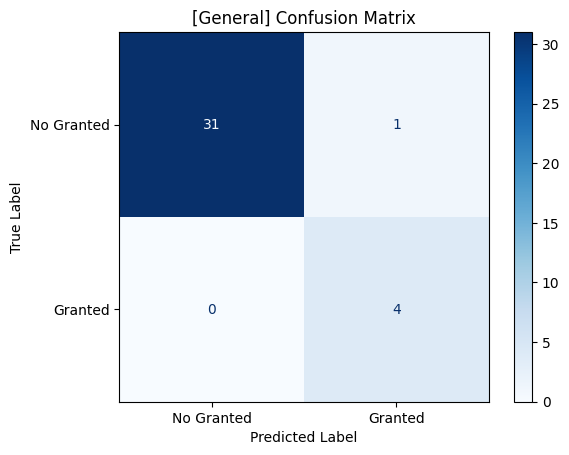

[Married women]confusion matrix:
 [[7 1]
 [0 0]]


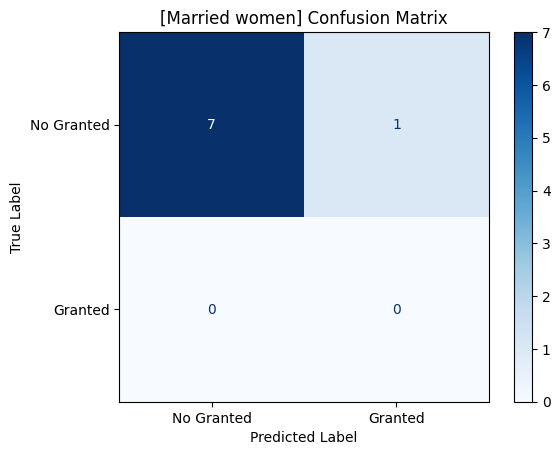

[Single men]confusion matrix:
 [[21  1]
 [ 0  1]]


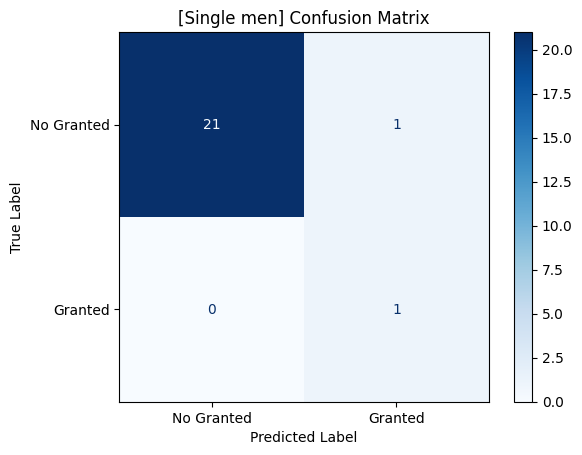

***********************************************************************************


In [48]:
# Make predictions on test set
y_pred = dtree.predict(X_test)

# Compute accuracy, balance accuracy, general confusion matrix and confusion matrices per protected groups
show_scholarship_prediction_results('DTree',X_test,y_test,y_pred)

### Random Forest

Initialize and fit Random Forest

In [49]:
# Initialize Random Forest
rfc = RandomForestClassifier(random_state=2)

# Fit Random Forest on the train set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

Make predictions and evaluate results


*************************************** RFC ***************************************
Accuracy: 94.44 %
Balanced Accuracy: 75.0 %
[General]confusion matrix:
 [[32  0]
 [ 2  2]]


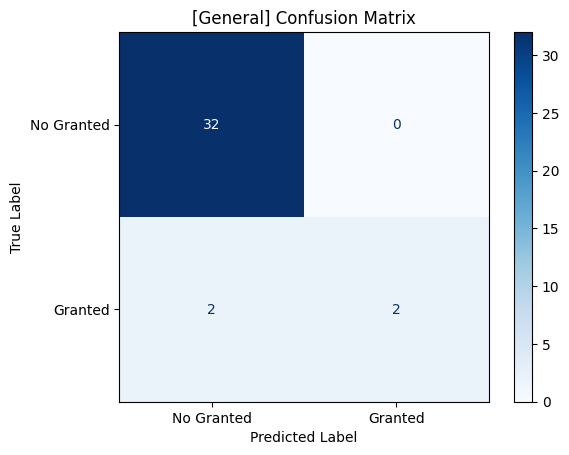

[Married women]confusion matrix:
 [[8 0]
 [0 0]]


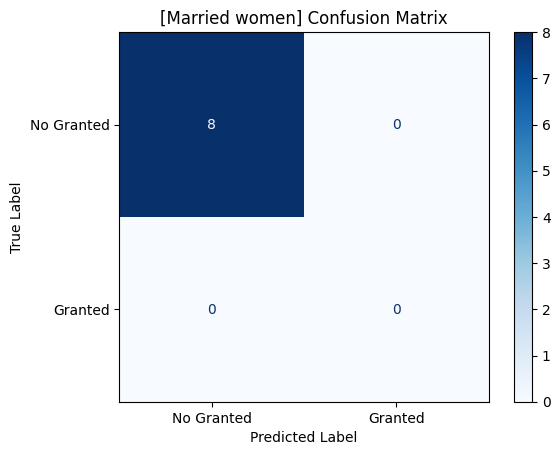

[Single men]confusion matrix:
 [[22  0]
 [ 0  1]]


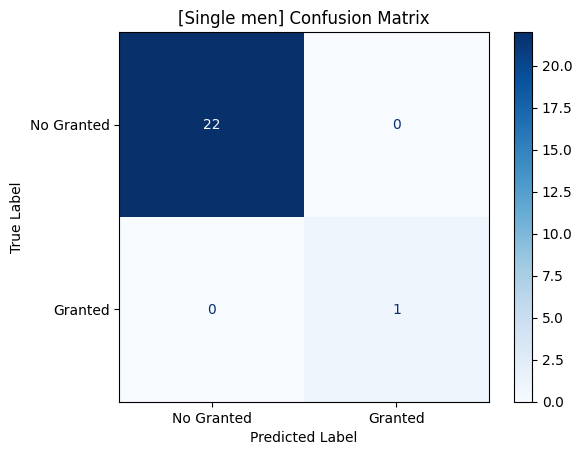

***********************************************************************************


In [50]:
# Make predictions on test set
y_pred = rfc.predict(X_test)

# Compute accuracy, balance accuracy, general confusion matrix and confusion matrices per protected groups
show_scholarship_prediction_results('RFC',X_test,y_test,y_pred)

### Logistic Regression

Initialize and fit Logistic Regression

In [52]:
# Initialize Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=200)

# Fit Rogistic Regression on the train set
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

Make predictions and evaluate results


*************************************** LR ***************************************
Accuracy: 97.22 %
Balanced Accuracy: 87.5 %
[General]confusion matrix:
 [[32  0]
 [ 1  3]]


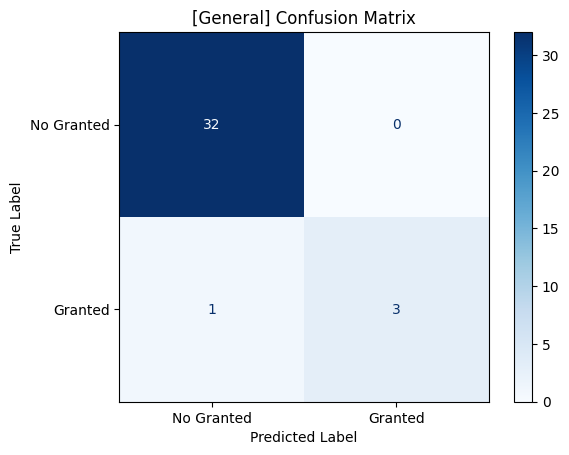

[Married women]confusion matrix:
 [[8 0]
 [0 0]]


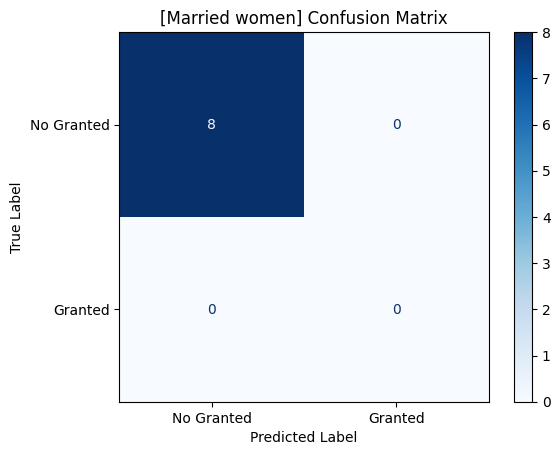

[Single men]confusion matrix:
 [[22  0]
 [ 0  1]]


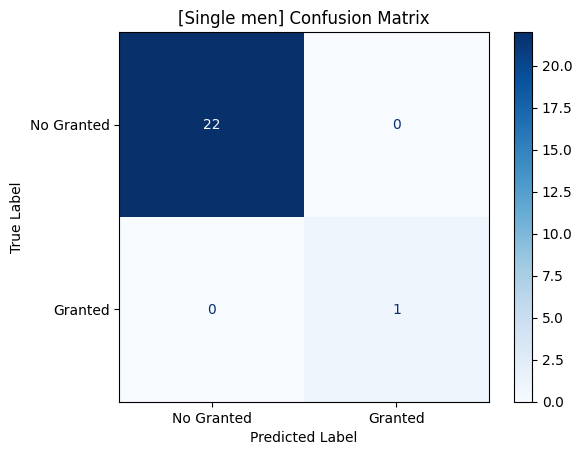

***********************************************************************************


In [53]:
# Make predictions on test set
y_pred = lr.predict(X_test)

# Compute accuracy, balance accuracy, general confusion matrix and confusion matrices per protected groups
show_scholarship_prediction_results('LR',X_test,y_test,y_pred)